# Image classification

In [3]:
import cPickle, gzip, numpy
import cv2
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
mnist_file = 'mnist.pkl.gz'


# Load the dataset
f = gzip.open(mnist_file, 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

# separete to data and labels:
x_train, y_train = train_set
x_test, y_test = test_set

<IPython.core.display.Javascript object>


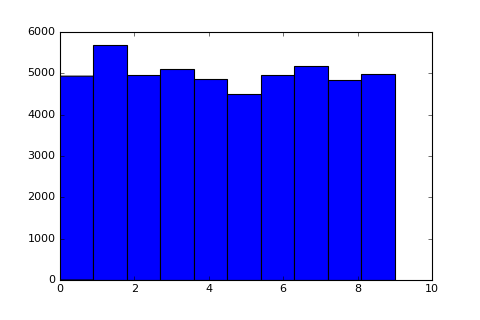

(array([ 4932.,  5678.,  4968.,  5101.,  4859.,  4506.,  4951.,  5175.,
         4842.,  4988.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

In [5]:
plt.hist(y_train)

In [8]:
[sum(y_train[:10000]==i) for i in range(10)]

[1001, 1127, 991, 1032, 980, 863, 1014, 1070, 944, 978]

In [5]:
x_test.shape

(10000, 784)

<IPython.core.display.Javascript object>


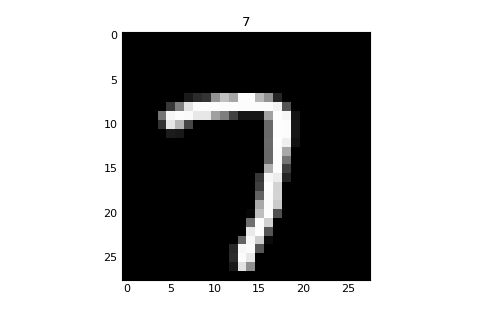

In [6]:
# show sample #234
i = 254
a = x_test[i]
a = a.reshape([28,28])
label = y_test[i]

plt.figure()
plt.imshow(a, cmap='gray', interpolation='nearest')
plt.title(label)
plt.show()

In [7]:
import sklearn.svm
clf = sklearn.linear_model.LogisticRegression(verbose=1)
clf.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [8]:
pred = clf.predict(x_test)

# Performance measurements
More in:
    * http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    * http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [9]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, pred))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False):
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.92      0.94      0.93       982
          5       0.89      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.92      1028
          8       0.87      0.87      0.87       974
          9       0.90      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000


Confusion matrix:
[[ 961    0    1    2    0    4    6   

In [10]:
pred = clf.decision_function(x_test)
pred.shape

(10000, 10)

In [11]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test==i, pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<IPython.core.display.Javascript object>


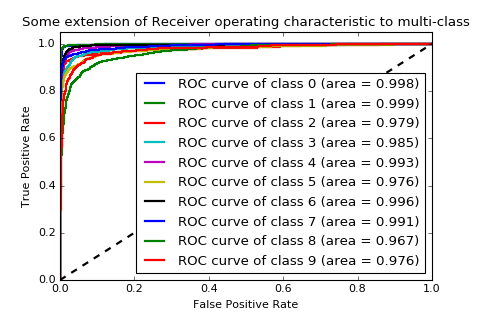

In [12]:
plt.figure()
for i, color in enumerate(range(n_classes)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Aliasing

<IPython.core.display.Javascript object>


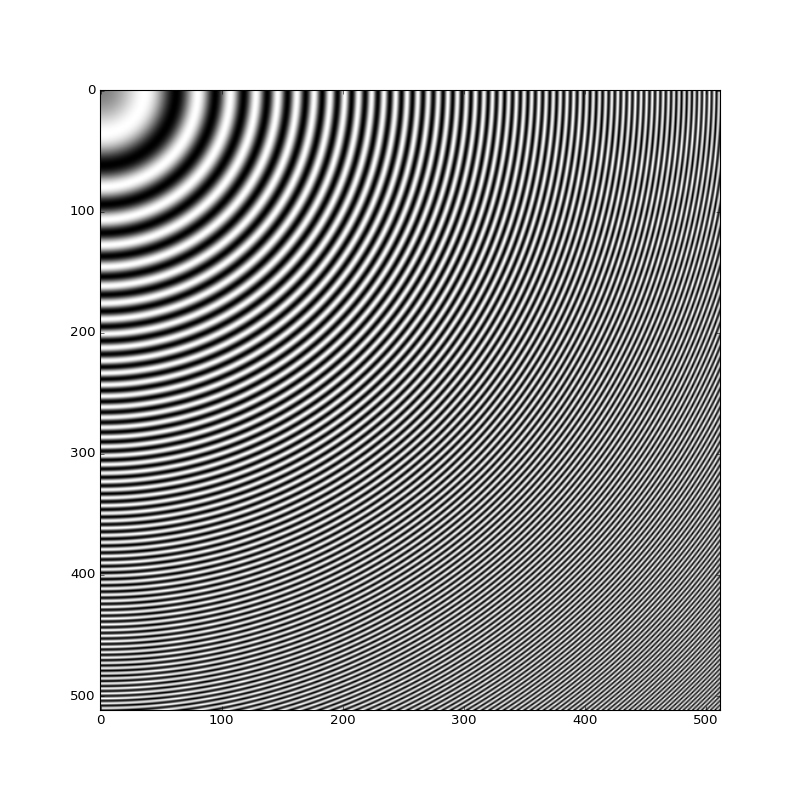

In [33]:
image = cv2.imread('aliasing.png')

plt.figure(figsize=(10, 10))
plt.imshow(image)

<IPython.core.display.Javascript object>


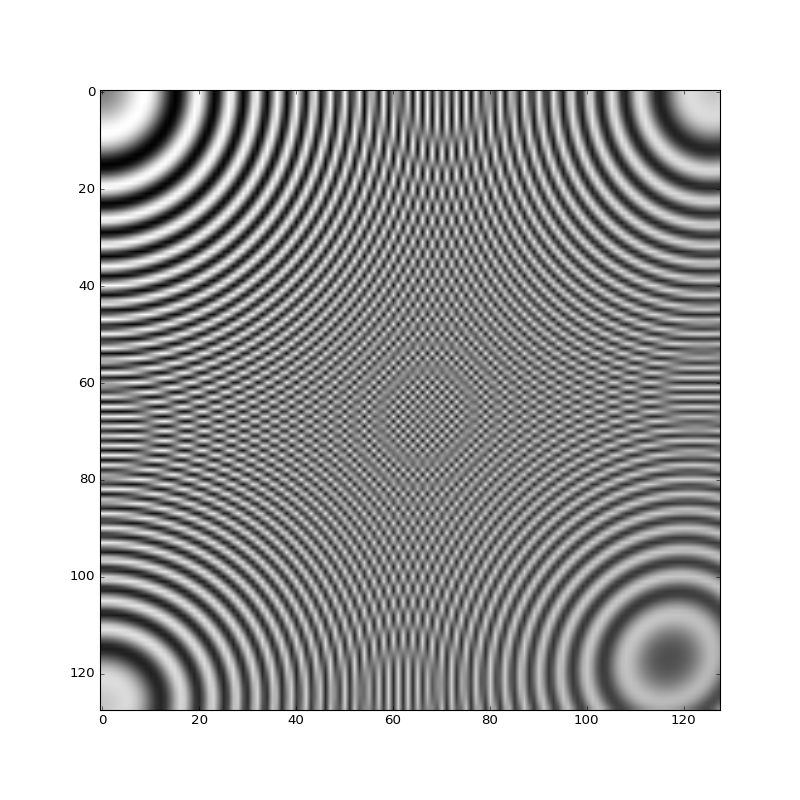

In [34]:
res = cv2.resize(image,None, fx=0.25, fy=0.25)

plt.figure(figsize=(10, 10))
plt.imshow(res)

<IPython.core.display.Javascript object>


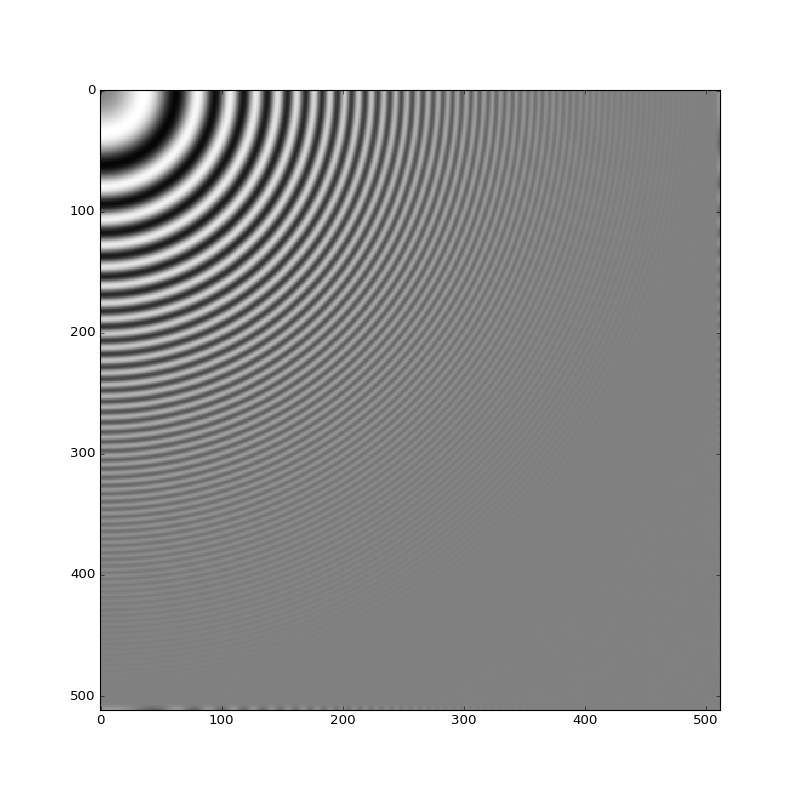

In [35]:
sigX = 2
sigY = sigX
blur_img = cv2.GaussianBlur(image,(25,25),sigX, sigY)

plt.figure(figsize=(10, 10))
plt.imshow(blur_img, interpolation='nearest')

<IPython.core.display.Javascript object>


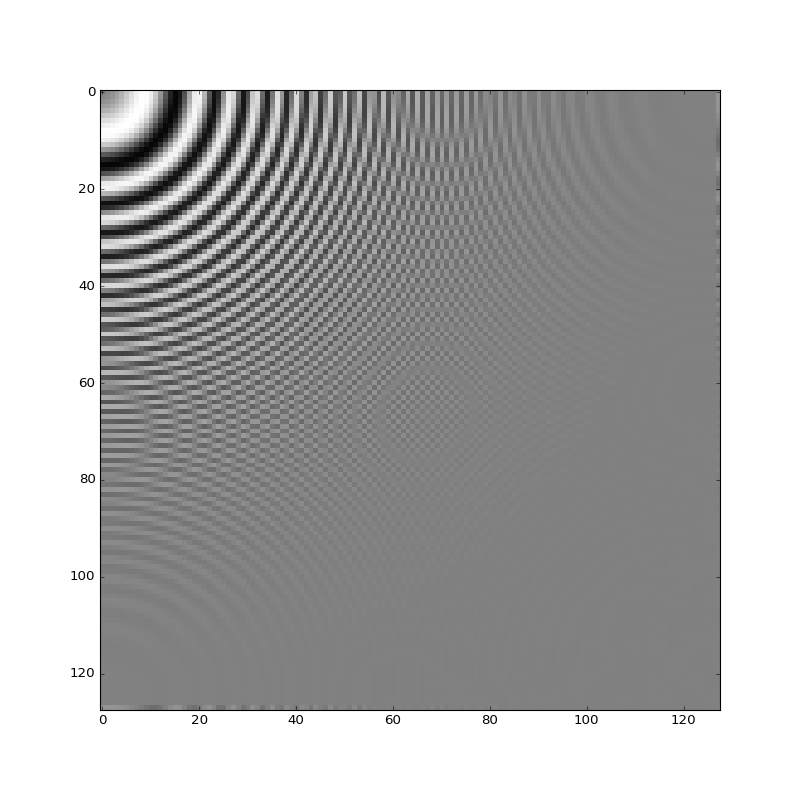

In [37]:
res = cv2.resize(blur_img,None, fx=0.25, fy=0.25)
# res = cv2.pyrDown(image)

plt.figure(figsize=(10, 10))
plt.imshow(res, interpolation='nearest')

# Laplacian pyramid and image blending
* based on http://docs.opencv.org/3.1.0/dc/dff/tutorial_py_pyramids.html

<IPython.core.display.Javascript object>


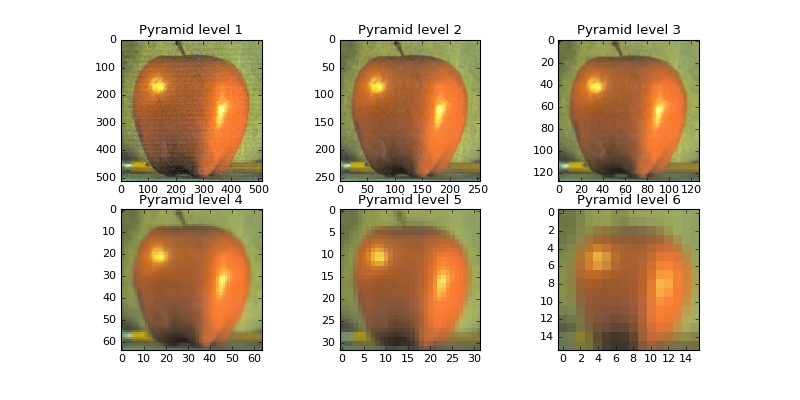

In [71]:
import cv2
import numpy as np,sys

A = cv2.cvtColor(cv2.imread('apple.jpg'), cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('orange.jpg'), cv2.COLOR_BGR2RGB)
 
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in xrange(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

a = ax.ravel()
for i in range(6):
    a[i].imshow(gpA[i], interpolation='nearest') 
    a[i].set_title('Pyramid level ' + str(i+1))

<IPython.core.display.Javascript object>


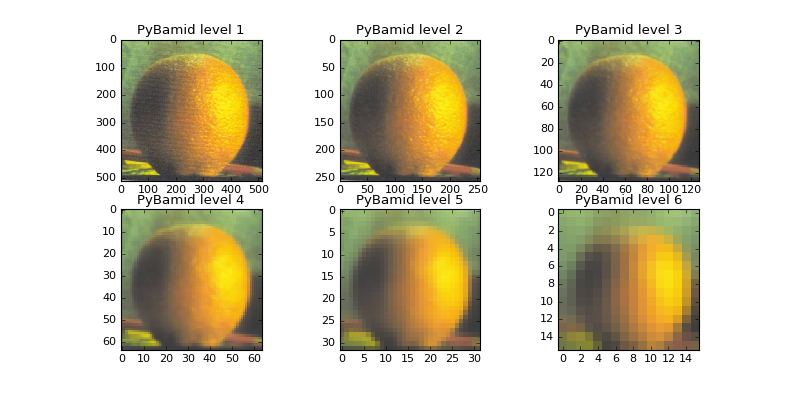

In [73]:
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in xrange(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

a = ax.ravel()
for i in range(6):
    a[i].imshow(gpB[i], interpolation='nearest') 
    a[i].set_title('PyBamid level ' + str(i+1))
    

<IPython.core.display.Javascript object>


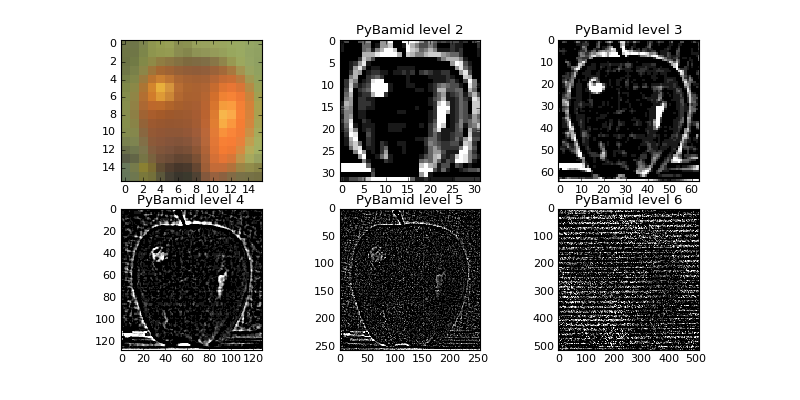

In [100]:
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in xrange(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

a = ax.ravel()
a[0].imshow(lpA[0], interpolation='nearest')

for i in xrange(1,6):
    a[i].imshow(cv2.cvtColor(lpA[i], cv2.COLOR_RGB2GRAY), interpolation='nearest', cmap='gray', clim=(0,10))
    a[i].set_title('PyBamid level ' + str(i+1))
    

<IPython.core.display.Javascript object>


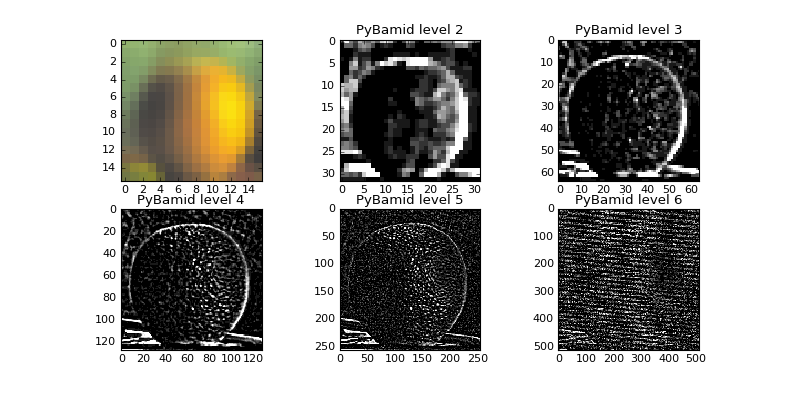

In [101]:
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in xrange(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

a = ax.ravel()
a[0].imshow(lpB[0], interpolation='nearest')

for i in xrange(1,6):
    a[i].imshow(cv2.cvtColor(lpB[i], cv2.COLOR_RGB2GRAY), interpolation='nearest', cmap='gray', clim=(0,10))
    a[i].set_title('PyBamid level ' + str(i+1))
    

<IPython.core.display.Javascript object>


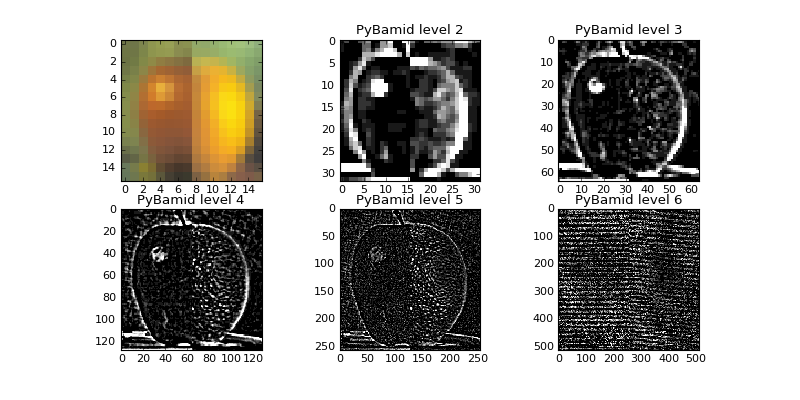

In [102]:
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
    LS.append(ls)
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

a = ax.ravel()
a[0].imshow(LS[0], interpolation='nearest')

for i in xrange(1,6):
    a[i].imshow(cv2.cvtColor(LS[i], cv2.COLOR_RGB2GRAY), interpolation='nearest', cmap='gray', clim=(0,10))
    a[i].set_title('PyBamid level ' + str(i+1))

<IPython.core.display.Javascript object>


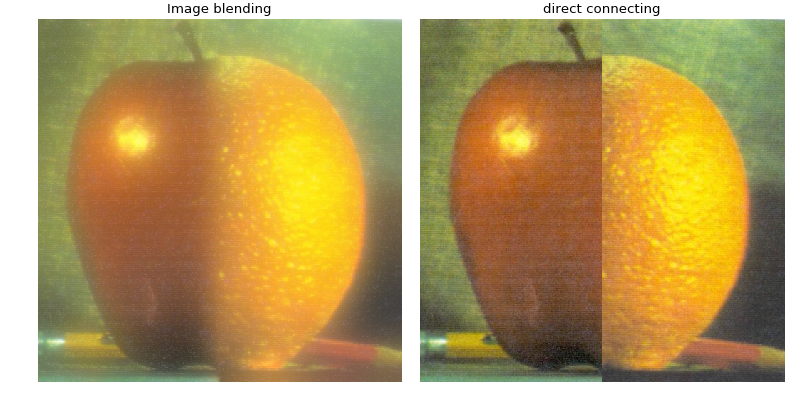

In [47]:
# now reconstruct
ls_ = LS[0]
for i in xrange(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                       sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0].imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB), interpolation='nearest') 
ax[0].axis('off')
ax[0].set_title('Image blending')

ax[1].imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB), interpolation='nearest')
ax[1].axis('off')
ax[1].set_title('direct connecting')

fig.tight_layout()

In [52]:
print [a.shape for a in gpA] 

[(512, 512, 3), (256, 256, 3), (128, 128, 3), (64, 64, 3), (32, 32, 3), (16, 16, 3), (8, 8, 3)]


# Features detection and descriptors

In [38]:
def draw_circle(c,r):
    t = np.arange(0,1.01,.01)*2*np.pi
    x = r*np.cos(t) + c[0]
    y = r*np.sin(t) + c[1]
    plt.plot(x,y,'b',linewidth=2)

def plot_features(im,locs,circle=False):
    """
    Show image with features. 
    input:im (image as array), locs(row,col,scale,orientation of eachfeature).
    """
    plt.imshow(im)
    if circle:
        for p in locs:
            draw_circle(p[:2],p[2])
    else:
        plt.plot(locs[:,0],locs[:,1],'ob')
    plt.axis('off')

<IPython.core.display.Javascript object>


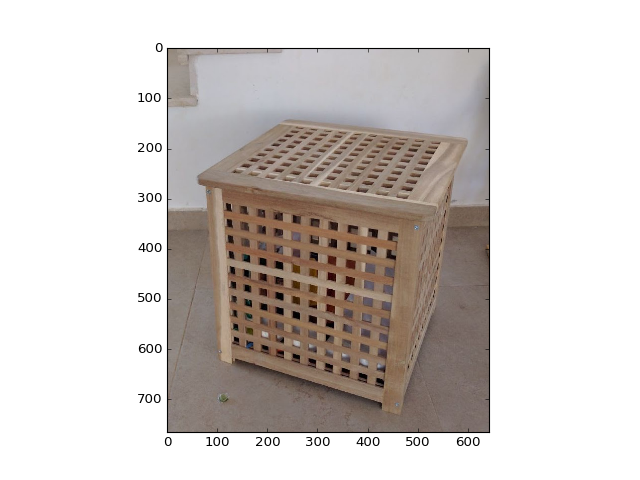

In [39]:
image = cv2.cvtColor(cv2.imread('img/IMG_20161112_200552.jpg'), cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.show()

# Harris Corner Detection

http://docs.opencv.org/trunk/dc/d0d/tutorial_py_features_harris.html

<IPython.core.display.Javascript object>


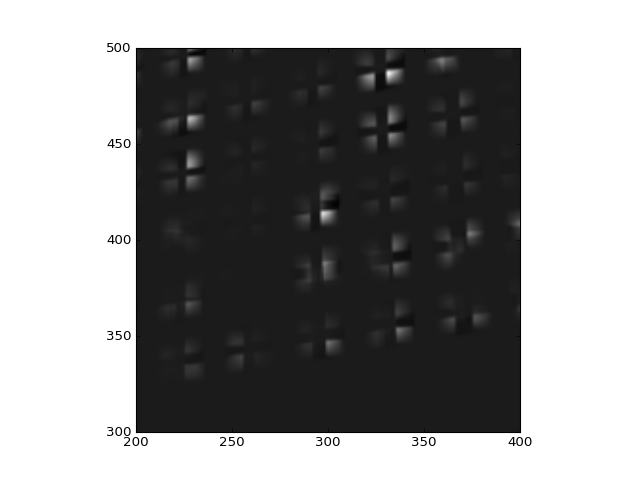

(300, 500)

In [41]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
 
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,10,3,0.04)

plt.figure()
plt.imshow(dst, cmap='gray')
plt.xlim([200,400])
plt.ylim([300, 500])

# SIFT

In [42]:
sift = cv2.xfeatures2d.SIFT_create()

(pts, descs) = sift.detectAndCompute(image, None)

In [43]:
print 'Num of detected points - %d' % len(pts)
print descs.shape

Num of detected points - 1268
(1268, 128)


In [10]:
pts[0]

<KeyPoint 0x7fec140d0720>

In [1]:
locs = [[p.pt[0], p.pt[1], p.size, p.angle] for p in pts]
plt.figure()
plot_features(image, locs, circle=True)
plt.show()

NameError: name 'pts' is not defined

<IPython.core.display.Javascript object>


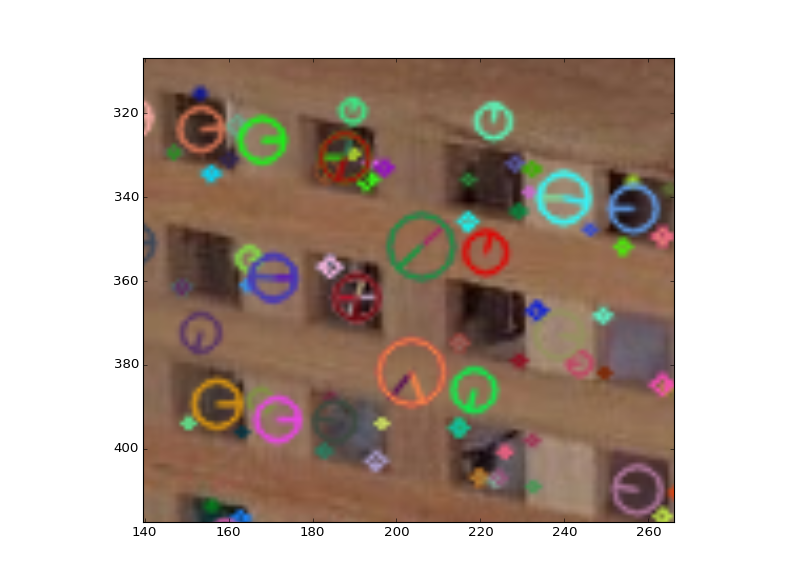

In [44]:
img = np.zeros_like(image)
img = cv2.drawKeypoints(image,pts, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure()
plt.imshow(img)